***Dataset***

**order_id** : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer

**order_date** : tanggal terjadinya transaksi

**customer_id** : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali

**city** : kota tempat toko terjadinya transaksi

**province** : provinsi (berdasarkan city)

**product_id** : ID dari suatu product yang dibeli

**brand** : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama

**quantity** : Kuantitas/banyaknya product yang dibeli

**item_price** : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

**Mengambil dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

tabel= pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv")
tabel

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


**Membuat Kolom Baru GMV (harga x kuantitas) dan Bulan**

In [3]:
#bikin kolom baru GMV
tabel['GMV']=tabel['item_price']*tabel['quantity']
tabel

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,GMV
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,8950000
...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,5560000


In [4]:
#bikin kolom baru bulan
tabel['month']=tabel['order_date'].str.slice(0,7) #dipotong nama di isi kolomnya sampe huruf ke-brp
tabel
tabel.to_excel("gmv_modif.xlsx")

**Menggrupkan**

Agar tidak berat me-render

In [5]:
df=tabel.groupby('month')['GMV'].sum().reset_index()
df

,month,GMV
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


**Membuat tabel kontribusi GMV per-provinsi**

In [34]:
import pandasql as ps

# bikin data / group
df2 = ps.sqldf("""select province, sum(GMV) as GMVtotal
            from tabel
            group by province
            order by GMVtotal desc
        """)
print('Tabel kontribusi GMV per-provinsi')

df2

Tabel kontribusi GMV per-provinsi


,province,GMVtotal
0,DKI Jakarta,14902763000
1,Jawa Barat,6128149000
2,Jawa Tengah,3485884000
3,Yogyakarta,3111241000
4,Jawa Timur,2649486000
5,Banten,1495632000
6,Bali,1201212000


**Membuat tabel kontribusi GMV per-Kota di Jakarta dan Jawa Barat**

In [7]:
# bikin data / group
df3 = ps.sqldf("""select city, sum(GMV) as totalgmv
            from tabel
            where province='Jawa Barat' or province='DKI Jakarta'
            group by city
            order by totalgmv desc
        """)

df3

,city,totalgmv
0,Jakarta Selatan,5253726000
1,Jakarta Pusat,4007915000
2,Bogor,2803750000
3,Jakarta Barat,2042195000
4,Jakarta Utara,1974986000
5,Jakarta Timur,1623941000
6,Bekasi,1299362000
7,Bandung,1190602000
8,Depok,834435000


**Membuat tabel kontribusi GMV per-Kota di Jakarta**

In [8]:
# bikin data / group
df8 = ps.sqldf("""select city, sum(GMV) as totalgmv
            from tabel
            where province='DKI Jakarta'
            group by city
            order by totalgmv desc
        """)

df8

,city,totalgmv
0,Jakarta Selatan,5253726000
1,Jakarta Pusat,4007915000
2,Jakarta Barat,2042195000
3,Jakarta Utara,1974986000
4,Jakarta Timur,1623941000


**Tabel GMV per-Kota di DKI Jakarta Setelah Bulan ke-10**

In [9]:
tabel_dki_q4 = tabel[(tabel['province']=='DKI Jakarta') & (tabel['month'] >= '2019-10')]
tabel_dki_q4

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,GMV,month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,7400000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,1208000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,8360000,2019-11
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,8950000,2019-10
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,1465000,2019-11
...,...,...,...,...,...,...,...,...,...,...,...
4976,1736803,2019-12-22,14577,Jakarta Selatan,DKI Jakarta,P0753,BRAND_C,2,1500000,3000000,2019-12
4992,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,620000,2019-12
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2988000,2019-10
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,5560000,2019-10


**Tabel Total GMV per-Kustomer di DKI Jakarta Mulai Dari Bulan ke-10 (Q4)**

In [31]:
data_customer = (tabel_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'GMV':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
#print(data_customer.sort_values(by='orders', ascending=False))
print('Tabel Total GMV per-Kustomer di DKI\nJakarta Mulai Dari Bulan ke-10 (Q4)')
data_customer.head()

Tabel Total GMV per-Kustomer di DKI
Jakarta Mulai Dari Bulan ke-10 (Q4)


,customer_id,orders,quantity,GMV
0,12748,29,557,175286000
1,12839,4,91,45925000
2,12841,2,8,5385000
3,12849,1,2,3490000
4,12867,1,32,16207000


**Jumlah Transaksi vs GMV dari Customer**

In [11]:
tabel_cust = tabel.groupby('customer_id').agg({'quantity':'sum','GMV':'sum'}).reset_index()
tabel_cust

,customer_id,quantity,GMV
0,12391,10,10450000
1,12420,1,4475000
2,12471,52,28710000
3,12472,60,36367000
4,12474,49,41711000
...,...,...,...
1768,18265,36,8556000
1769,18272,17,19915000
1770,18282,2,4750000
1771,18283,42,28962000


**GMV per-Bulan di tahun 2019 Berdasarkan ...**

- Brand

In [32]:
#sudah ada kolom bulan n GMV, jadi tinggal buat groupby-nya aja
df6 = tabel.groupby(['month', 'brand'])['GMV'].sum().unstack()
print('Tabel GMV per-bulan di tahun 2019 berdasarkan brand')
df6

Tabel GMV per-bulan di tahun 2019 berdasarkan brand


brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


- Provinsi

In [33]:
df7=tabel.groupby(['month','province'])['GMV'].sum().unstack()
print('Tabel GMV per-bulan di tahun 2019 berdasarkan provinsi')
df7

Tabel GMV per-bulan di tahun 2019 berdasarkan provinsi


province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
month,,,,,,,
2019-07,79480000,191513000,1951871000,476533000,252429000,282076000,290139000
2019-08,125025000,254130000,2014393000,735536000,507441000,324629000,491769000
2019-09,214442000,89088000,1469887000,886835000,607802000,268764000,410184000
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


**GMV per-Bulan di Q4 tahun 2019 Berdasarkan ...**

- Brand

In [14]:
#bikin tabel q4nya dulu
tabel_q4 = tabel[(tabel['month'] >= '2019-10')]
tabel_q4

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,GMV,month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,7400000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,1208000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,8360000,2019-11
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,8950000,2019-10
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,1465000,2019-11
...,...,...,...,...,...,...,...,...,...,...,...
4994,1707424,2019-10-25,13021,Yogyakarta,Yogyakarta,P1913,BRAND_J,10,740000,7400000,2019-10
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,900000,2019-12
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2988000,2019-10
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,5560000,2019-10


In [15]:
#sudah ada kolom bulan n GMV, jadi tinggal buat groupby-nya aja
df4 = tabel_q4.groupby(['month', 'brand'])['GMV'].sum().unstack()
df4

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
month,,,,,,,,,,
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


Provinsi

In [16]:
df5=tabel_q4.groupby(['month','province'])['GMV'].sum().unstack()
df5

province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
month,,,,,,,
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


Menambah kolom Top Provinsi

In [17]:
top_provinsi = (tabel.groupby('province')['GMV']
                        .sum()
                        .reset_index()
                        .sort_values(by='GMV',ascending=False)
                        .head(5))
print(top_provinsi)

# Buat satu kolom lagi
tabel['top_provinsi'] = tabel['province'].apply(lambda x: x if (x in top_provinsi['province'].to_list()) else 'other')
tabel

      province          GMV
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,GMV,month,top_provinsi
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,7400000,2019-10,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,1208000,2019-10,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,8360000,2019-11,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,820000,2019-08,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,8950000,2019-10,DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,900000,2019-12,other
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,4395000,2019-07,Jawa Barat
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2988000,2019-10,DKI Jakarta
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,5560000,2019-10,DKI Jakarta


**Grafik, Histogram & Bar**

- Nilai GMV Per-Bulan di Tahun 2019

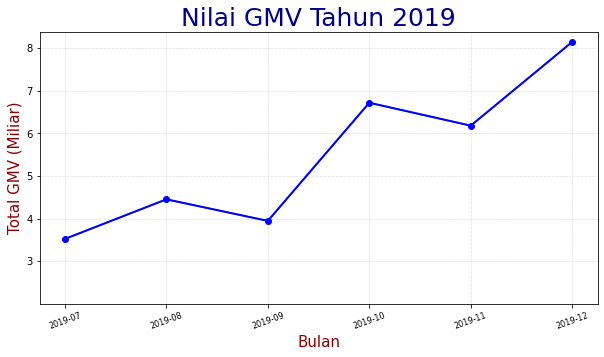

In [18]:
plt.figure(figsize=(10,5))

# membuat line plot
plt.plot(df['month'], df['GMV'])

# judul & label
plt.title('Nilai GMV Tahun 2019',color='darkblue', fontsize=25)
plt.xlabel('Bulan',fontsize=15,color='darkred')
plt.ylabel('Total GMV (Miliar)',fontsize=15,color='darkred')

# xticks & yticks
ytick_label,location = plt.yticks()
plt.yticks(ytick_label, (ytick_label/1000000000).astype(int))
plt.xticks(rotation=20,fontsize=8)

# garis
plot_line = plt.plot(df['month'], df['GMV'])
plt.setp(plot_line, color='blue', linestyle='-',  linewidth=2, marker='o')

# mulai y axis
#plt.ylim(ymin=0)#mulai dari 0
plt.ylim(ymin=2000000000)#mulai dari 2 (karena miliar)

# grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

# teks
#plt.text(2.7,4000000000, 'Peningkatan GMV ada \n di bulan 09 ke 10', color='darkred')

# save gambar
plt.savefig('nilai GMV per bulan 2019.png')

plt.show()

*Nilai GMV menurun di bulan ke-9 dan ke-11, namun grafiknya positif (mengalami kenaikan)*

- GMV per-Kota di DKI Jakarta

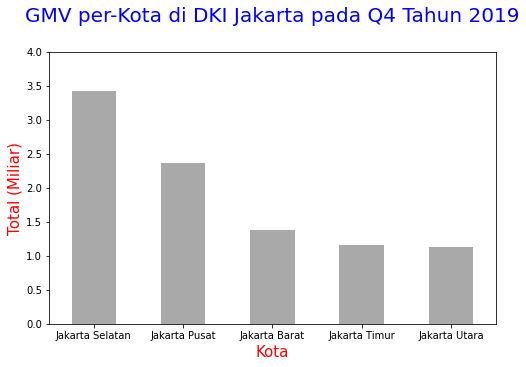

In [19]:
plt.clf()
tabel_dki_q4.groupby('city')['GMV'].sum().sort_values(ascending=False).plot(kind='bar', color='darkgray', figsize=(8,5))
plt.title('GMV per-Kota di DKI Jakarta pada Q4 Tahun 2019', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Kota', fontsize = 15, color='red')
plt.ylabel('Total (Miliar)', fontsize = 15, color='red')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.xticks(rotation=0)
plt.show()

*Kota Jakarta Selatan memberikan nilai GMV yang tertinggi, sedangkan Kota Jakarta Utara memberikan nilai GMV terkecil*

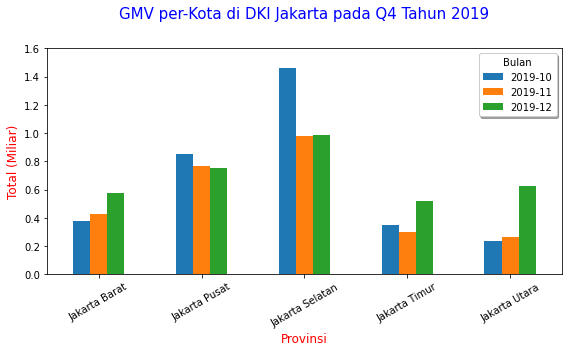

In [20]:
tabel_dki_q4.groupby(['city', 'month'])['GMV'].sum().unstack().plot(kind='bar', figsize=(8,5))
plt.title('GMV per-Kota di DKI Jakarta pada Q4 Tahun 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Provinsi', fontsize = 12, color='red')
plt.ylabel('Total (Miliar)',fontsize = 12, color='red')
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Bulan')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

*Di Kota Jakarta Selatan dan Jakarta Pusat, nilai GMV tertinggi pada kuadran ke-4 tahun 2019 terjadi pada bulan ke 10. Di Kota Jakarta Barat, Jakarta Timur, dan Jakarta Utara, nilai GMV tertinggi pada kuadran ke-4 tahun 2019 terjadi pada bulan ke 12.*

- Distribusi total GMV per-kustomer di Kuadran ke-4 Tahun 2019, DKI Jakarta

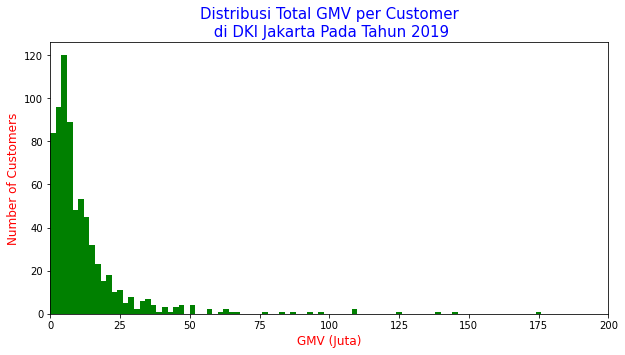

In [21]:
plt.figure(figsize=(10,5))
plt.hist(data_customer['GMV'], bins=100, range=(1,200000000), color='green')
plt.title('Distribusi Total GMV per Customer\n di DKI Jakarta Pada Tahun 2019',fontsize=15, color='blue')
plt.xlabel('GMV (Juta)', fontsize = 12, color='red')
plt.ylabel('Number of Customers',fontsize = 12, color='red')
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

Dari grafik diatas dapat disimpulkan bahwa mayoritas kustomer memiliki GMV kurang dari 25 juta

- GMV per-bulan berdasarkan brand di tahun 2019, DKI Jakarta

<Figure size 720x720 with 0 Axes>

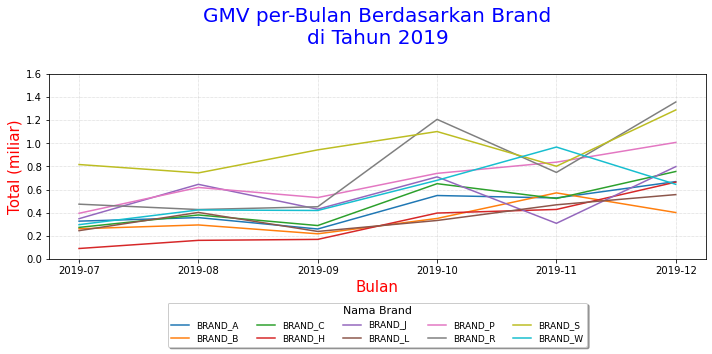

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,10))
#membuat kerangka grafik
df6.plot()
plt.title('GMV per-Bulan Berdasarkan Brand\ndi Tahun 2019', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize = 15, color='red')
plt.ylabel('Total (miliar)', fontsize=15, color='red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.legend(title='Nama Brand', loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=5, fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

plt.savefig('GMVperblndrbrand.png')

*Lonjakan GMV tertinggi terjadi pada bulan ke-10 dari Brand_R*

- GMV per-bulan berdasarkan Provinsi di tahun 2019, DKI Jakarta

<Figure size 720x720 with 0 Axes>

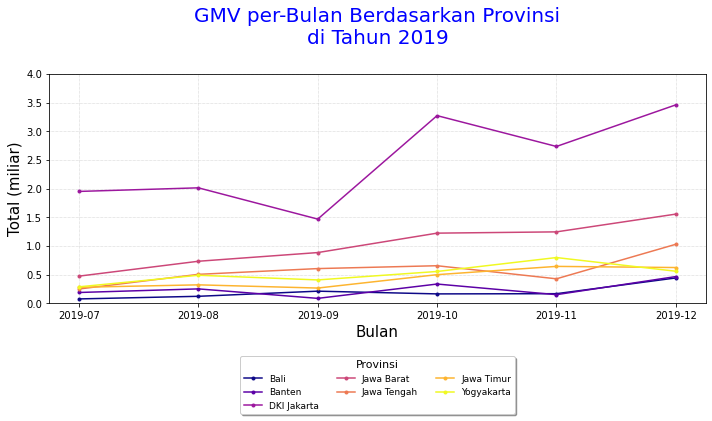

In [23]:
plt.figure(figsize=(10,10))
#tabel yang sebenarnya
plt.clf()
tabel.groupby(['month','province'])['GMV'].sum().unstack().plot(marker='.',cmap='plasma') #plasma adalah set warnanya. ada di https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.title('GMV per-Bulan Berdasarkan Provinsi\ndi Tahun 2019',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize = 15)
plt.ylabel('Total (miliar)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Provinsi',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 7)
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

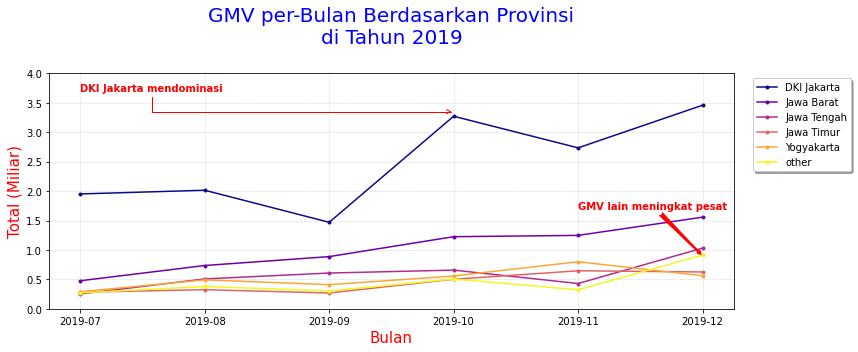

In [24]:
plt.figure(figsize=(10,10))
# Plot multi-line chartnya
import matplotlib.pyplot as plt
tabel.groupby(['month','top_provinsi'])['GMV'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('GMV per-Bulan Berdasarkan Provinsi\ndi Tahun 2019',loc='center',pad=30, fontsize=20, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.xlabel('Bulan', fontsize=15, color='red')
plt.ylabel('Total (Miliar)',fontsize = 15, color='red')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV lain meningkat pesat', xy=(5, 900000000),
			 xytext=(4, 1700000000), weight = 'bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
							connectionstyle='arc3',
							color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0, 3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle='angle',
						   color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

*Provinsi DKI Jakarta memiliki tingkat GMV tertinggi dari semua Provinsi*

**Pie Chart**

- Kontribusi GMV per-Provinsi

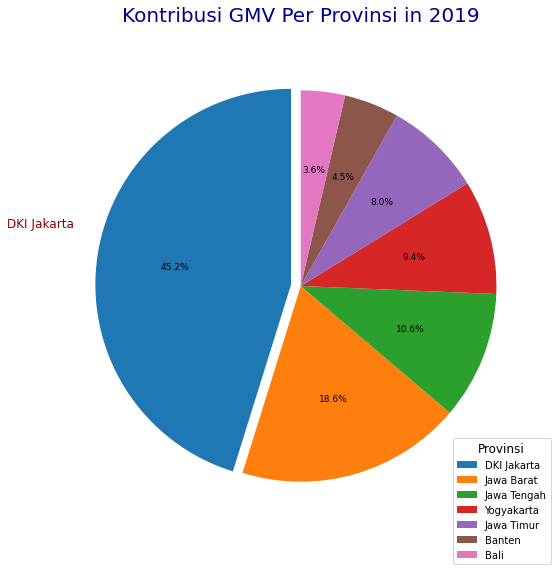

In [25]:
##membuat pie chart yg skala provinsi##
#perbesar figsize
plt.figure(figsize=(9,9))

# slicing bagian
myexplode = [0.05, 0, 0, 0, 0, 0, 0]
#yg paling gede doangan yg dipisahin. lebih 1 dr jmlh data

#Plotting
plt.pie(df2['GMVtotal'],labels = df2['province'] ,autopct='%1.1f%%', explode=myexplode ,startangle=90, textprops={'fontsize': 9}, labeldistance=None)
#autopct untuk ngasih persen
#explode untuk misahin yg paling gede
#textprops untu ngubah ukuran font persenan

# set title & label
plt.title('Kontribusi GMV Per Provinsi in 2019',loc='center', pad=20, fontsize=20, color='darkblue')

#legend
plt.legend(bbox_to_anchor=(0.8,0.2), title='Provinsi', fontsize = 10, title_fontsize=12)
#1.3, 0.2 utk ngatur posisi legend

#add text
plt.text(-1.5,0.3, 'DKI Jakarta', color='darkred', fontsize=12)
#-1.5, 0.3 untuk naro tulisan DKI Jakartanya
# save pict
plt.savefig('diagramGMVperprov.png')

# tampilkan plot
plt.show()

- Kontribusi GMV per-kota di DKI Jakarta

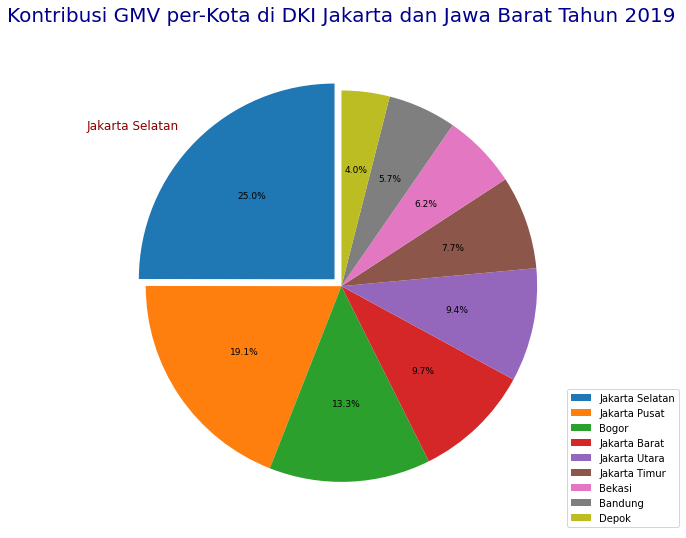

In [26]:
#perbesar figsize
plt.figure(figsize=(9,9))

# slicing bagian
myexplode = [0.05, 0, 0, 0, 0, 0, 0, 0, 0]
#yg paling gede doangan yg dipisahin

#Plotting
plt.pie(df3['totalgmv'],labels = df3['city'] ,autopct='%1.1f%%', explode=myexplode ,startangle=90, textprops={'fontsize': 9}, labeldistance=None)
#autopct untuk ngasih persen
#explode untuk misahin yg paling gede
#textprops untu ngubah ukuran font persenan

# title & label
plt.title('Kontribusi GMV per-Kota di DKI Jakarta dan Jawa Barat Tahun 2019',loc='center', pad=20, fontsize=20, color='darkblue')

#legend
plt.legend(bbox_to_anchor=(1.2,0.3))

#add text
plt.text(-1.3,0.8, 'Jakarta Selatan', color='darkred', fontsize=12)
#-1.5, 0.5 untuk naro tulisan DKI Jakartanya
# save pict
plt.savefig('diagramGMVpercitjakjab.png')

# tampilkan plot
plt.show()

*Kota dengan Kontribusi GMV terbesar adalah Jakarta Selatan dan dengan Kontribusi terkecil adalah Depok*

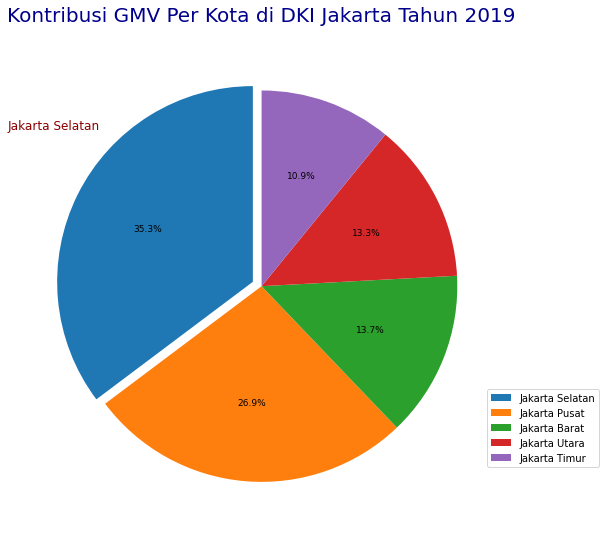

In [27]:
##membuat pie chart yg skala provinsi##
#perbesar figsize
plt.figure(figsize=(9,9))

# slicing bagian
myexplode = [0.05, 0, 0, 0, 0]
#yg paling gede doangan yg dipisahin

#Plotting
plt.pie(df8['totalgmv'],labels = df8['city'] ,autopct='%1.1f%%', explode=myexplode ,startangle=90, textprops={'fontsize': 9}, labeldistance=None)
#autopct untuk ngasih persen
#explode untuk misahin yg paling gede
#textprops untu ngubah ukuran font persenan

# set title & label
plt.title('Kontribusi GMV Per Kota di DKI Jakarta Tahun 2019',loc='center', pad=20, fontsize=20, color='darkblue')

#legend
plt.legend(bbox_to_anchor=(1.2,0.3))

#add text
plt.text(-1.3,0.8, 'Jakarta Selatan', color='darkred', fontsize=12)
#-1.5, 0.5 untuk naro tulisan DKI Jakartanya
# save pict
plt.savefig('diagramGMVpercitjakjab.png')

# tampilkan plot
plt.show()

*Kota dengan Kontribusi GMV terbesar adalah Jakarta Selatan dan dengan Kontribusi terkecil adalah Jakarta Timur*